follows [this blog post](http://neuralnetworksanddeeplearning.com/chap6.html)

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
data_directory = "neural-networks-and-deep-learning/data/"

"neural-networks-and-deep-learning/data/"

In [3]:
training_data = readcsv(join([data_directory, "training.csv"]))';

In [4]:
training_answers = readcsv(join([data_directory, "training_answers.csv"]))[:];

In [56]:
validation_data = readcsv(join([data_directory, "validation.csv"]))';

In [54]:
validation_answers = readcsv(join([data_directory, "validation_answers.csv"]));

Label: 0

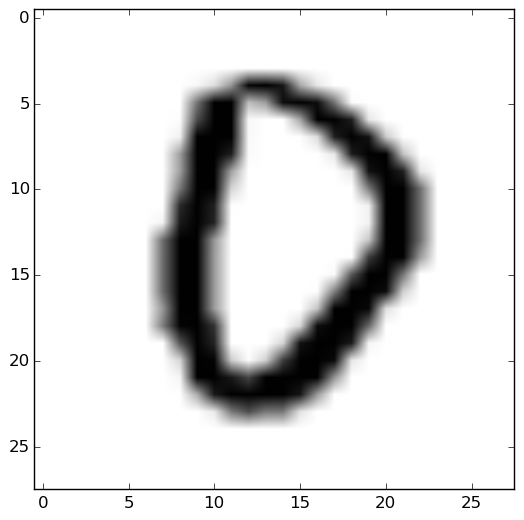

In [5]:
i = rand(1:50000)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
@printf("Label: %i", training_answers[i])

In [38]:
function feedforward(weights, biases, activations, f)
    for i = 1:length(weights)
        activations = f(weights[i] * activations + biases[i])
    end
    return activations ./ sum(activations)
end

feedforward (generic function with 1 method)

In [7]:
function sigmoid(x)
    return 1.0 ./ (1.0 + exp(-x))
end

sigmoid (generic function with 1 method)

In [8]:
function d_sigmoid(x)
    a = exp(-x)
    return a ./ ( 1 + a).^2
end

d_sigmoid (generic function with 1 method)

In [9]:
weights = {randn(30,784),randn(10,30)}
biases = {randn(30), randn(10)}

2-element Array{Any,1}:
 [1.47764,-1.00097,0.308822,-1.65906,-0.48616,-0.715851,-0.703666,-1.14788,0.530105,0.505051  …  0.00231476,1.01275,0.132036,1.4029,0.862967,-0.47783,-0.259008,-0.718181,-0.961018,-0.761115]
 [1.31414,0.0756061,0.16657,-1.58235,0.100011,-0.0394415,0.6343,0.477743,-0.354013,-0.617731]                                                                                                 

In [11]:
function backprop(weights, biases, input, answer, f, df, s)
    n = length(weights)
    
    function propagator(input, i)
        if i == n+1
            a = input
            a[answer+1] -= 1.0
            return a
        else
            weighted_sum = weights[i] * input + biases[i]
            layer_output = f(weighted_sum)
            d_layer_output = df(weighted_sum)
        
            backpropagator = propagator(layer_output, i+1) .* d_layer_output
            biases[i] -= s * backpropagator
            weights[i] -= s * backpropagator * input'
            return weights[i]' * backpropagator
        end
    end
    propagator(input, 1)
end


backprop (generic function with 1 method)

In [189]:
for i = 1:50000
    backprop(weights, biases, training_data[:,i], training_answers[i], sigmoid, d_sigmoid, 0.05);
end

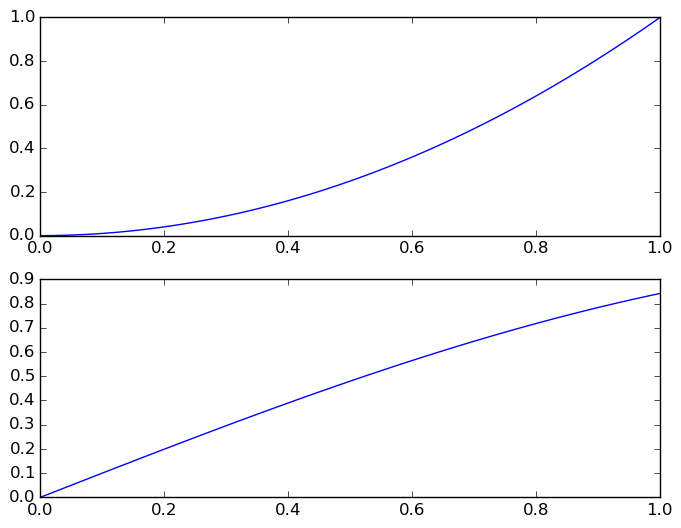

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xace19fcc>

In [203]:
X = linspace(0,1)
subplot(211)
plot(X,X.^2)
subplot(212)
plot(X,sin(X))

Image number: 38677
Image Label: 6
Network Guess: 6

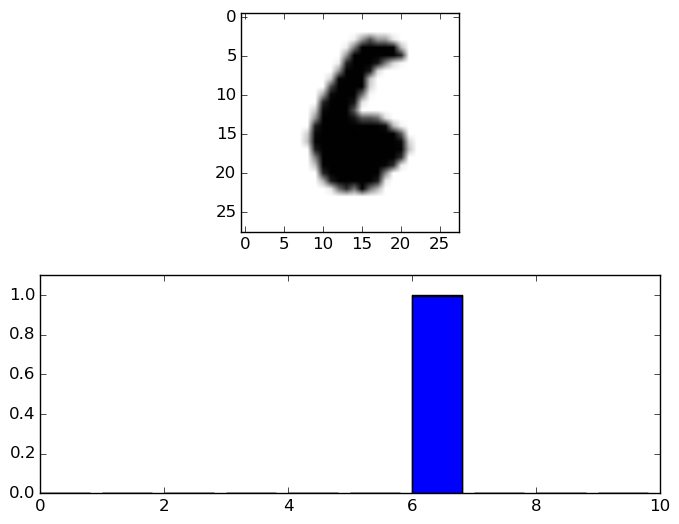

In [213]:
i = rand(1:50000)
network_guess = indmax(feedforward(weights,biases, training_data[:,i], sigmoid))-1
@printf("Image number: %d\nImage Label: %d\nNetwork Guess: %d", i, training_answers[i], network_guess)
subplot(211)
imshow(reshape(training_data[:,i],(28,28))',cmap="Greys")
subplot(212)
axis([0.0,10.0,0.0,1.1])
bar([0:9],[ (training_answers[i] == j ? 1.0 : 0.0) for j in 0:9 ], color="red")
bar([0:9],feedforward(weights,biases, training_data[:,i], sigmoid));

In [188]:
n = length(validation_answers)
accuracy = 0
for i = 1:n
    if indmax(feedforward(weights, biases, validation_data[:,i], sigmoid))-1 == validation_answers[i]
        accuracy += 1
    end
end
@printf("Network Accuracy: %f", accuracy/n)

Network Accuracy: 0.946700

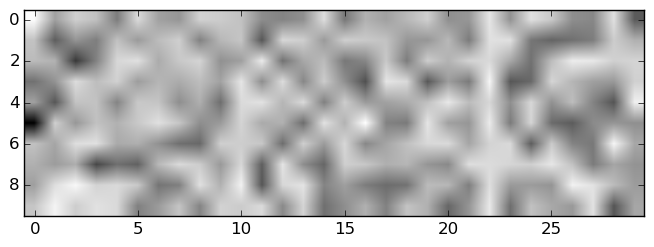

PyObject <matplotlib.image.AxesImage object at 0xaa1d29ec>

In [79]:
imshow(weights[2], cmap="Greys")

In [100]:
function sample( thing )
    i = 1
    x = rand()
    for j = 1:10
        x -= thing[i]
        if x < 0
            return j
            break
        end
    end
end

sample (generic function with 1 method)

In [101]:
feedforward(weights, biases, validation_data[:,1], sigmoid)

10-element Array{Float64,1}:
 1.08264e-5
 0.00013667
 0.00836052
 0.98065   
 5.1646e-7 
 0.00037059
 9.58759e-6
 9.73827e-7
 0.0104605 
 8.94349e-8

In [182]:
sample( feedforward(weights, biases, training_data[:,15143], sigmoid) )-1

0

In [173]:
function sample( w )
    x = rand() * sum( w )
    y = 0
    for i = 1:length(w)
        y = y + w[i]
        if x < y
            return i
        end
    end
end

sample (generic function with 1 method)